
### 求卷积

In [15]:

import numpy as np
from scipy.signal import convolve2d
from imageio import imread
import matplotlib.pyplot as plt
from IPython import display


arr1= np.array([1,2,3])
arr2= np.array([4,5,6])
arr3 =np.convolve(arr1,arr2)

print(arr3)

arr4 =np.convolve(arr2,arr1)
print(arr4)

arr5= np.array([1,2,3])
arr6=np.array([1,2,3])
arr7 =np.convolve(arr5,arr6)
arr7

[ 4 13 28 27 18]
[ 4 13 28 27 18]


array([ 1,  4, 10, 12,  9])

### 对图片进行卷积

In [16]:

imgN = 20

image = np.random.randn(imgN,imgN)
image


array([[-1.26003485e+00,  1.38272470e-01,  1.58147500e+00,
        -3.03933200e-01, -9.78871986e-01, -4.61993847e-01,
        -1.31554923e-01,  4.08594647e-01, -1.18920489e+00,
        -1.28622323e+00,  6.68561311e-01, -6.59628153e-01,
         6.39412563e-01, -7.80507391e-01,  8.82722024e-01,
        -1.41299308e+00, -1.35320395e+00,  7.95788249e-01,
         1.53136580e+00,  6.27888047e-01],
       [-1.51813109e-01,  1.81441701e+00, -4.78278714e-02,
         9.52107972e-01, -1.22135549e+00,  5.89117045e-01,
        -1.44164464e+00, -2.43073935e-01, -2.48491272e-03,
         6.19189573e-01, -7.27375988e-01, -6.79758125e-01,
        -1.54583894e+00, -1.58450686e-01,  1.84961569e+00,
         4.11495410e-01, -2.54152267e-01, -3.72149628e-01,
         1.34006297e-02, -5.47269103e-02],
       [ 1.33488604e+00,  1.05326782e-01, -8.56011204e-01,
         6.42921492e-01,  3.95309262e-02,  2.97314086e+00,
         1.28173204e+00,  5.12431368e-01,  1.94782721e+00,
         3.21089165e-01,  5.8

In [17]:

kerelN =7

## 高斯分布
Y,X = np.meshgrid(np.linspace(-3,3,kerelN),np.linspace(-3,3,kerelN))
kernel =np.exp(-(X**2+Y**2)/2)

kernel.shape


(7, 7)

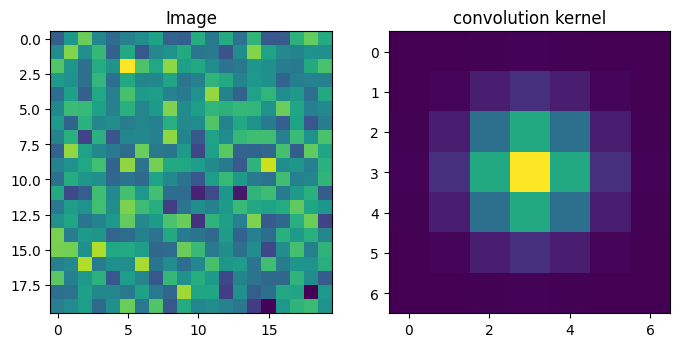

In [21]:

fig,ax = plt.subplots(1,2,figsize=(8,6))

ax[0].imshow(image)
ax[0].set_title('Image')

ax[1].imshow(kernel)
ax[1].set_title('convolution kernel')

plt.show()

In [22]:

convoluted_image = convolve2d(image,kernel,mode='valid')


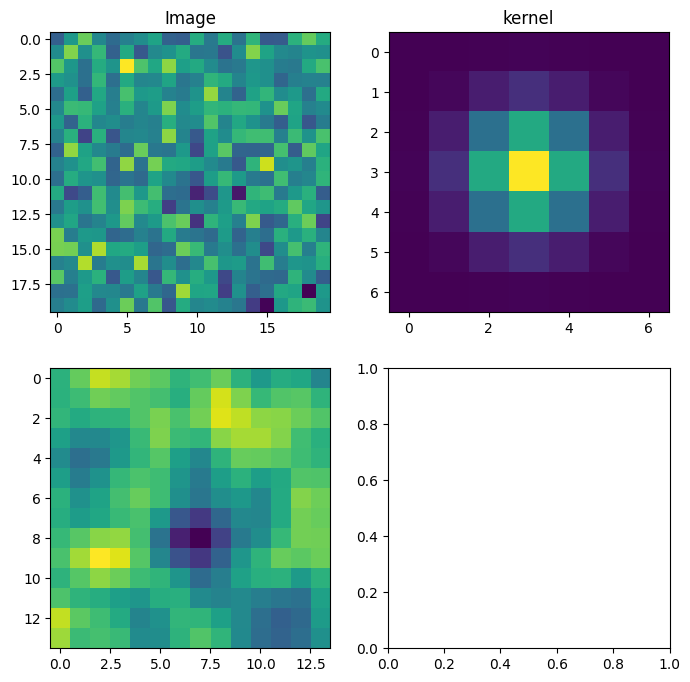

In [24]:

fig,ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].imshow(image)
ax[0,0].set_title('Image')

ax[0,1].imshow(kernel)
ax[0,1].set_title('kernel')

ax[1,0].imshow(convoluted_image)
plt.show()


#### 处理真实图片


In [27]:

bathtub = imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')



/var/folders/xm/xk46g6c12mb0xhyhwtsc99qw0000gn/T/ipykernel_73614/1120231469.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  bathtub = imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')


In [28]:
bathtub.shape

(1675, 3000, 3)

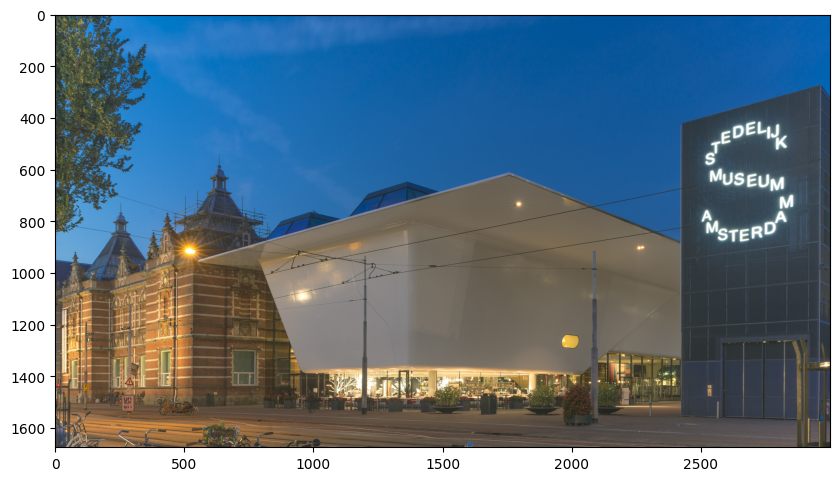

In [29]:

fig = plt.figure(figsize=(10,6))

plt.imshow(bathtub)



In [30]:


bathtub = np.mean(bathtub,axis=2)

bathtub

bathtub = bathtub/np.max(bathtub)

array([[54.        , 80.66666667, 77.        , ..., 93.        ,
        98.66666667, 91.33333333],
       [72.66666667, 62.        , 70.33333333, ..., 92.66666667,
        94.66666667, 94.66666667],
       [72.        , 87.        , 84.66666667, ..., 93.        ,
        92.66666667, 96.        ],
       ...,
       [66.33333333, 66.        , 67.33333333, ..., 45.66666667,
        47.66666667, 41.66666667],
       [66.66666667, 60.66666667, 66.33333333, ..., 43.66666667,
        43.66666667, 43.66666667],
       [63.66666667, 64.66666667, 70.33333333, ..., 43.66666667,
        42.66666667, 44.66666667]])

In [31]:
VK = np.array([[1,0,-1],
               [1,0,-1],
               [1,0,-1]])

HK = np.array([
    [1,1,1],
    [0,0,0] ,
    [-1,-1,-1]
]) 


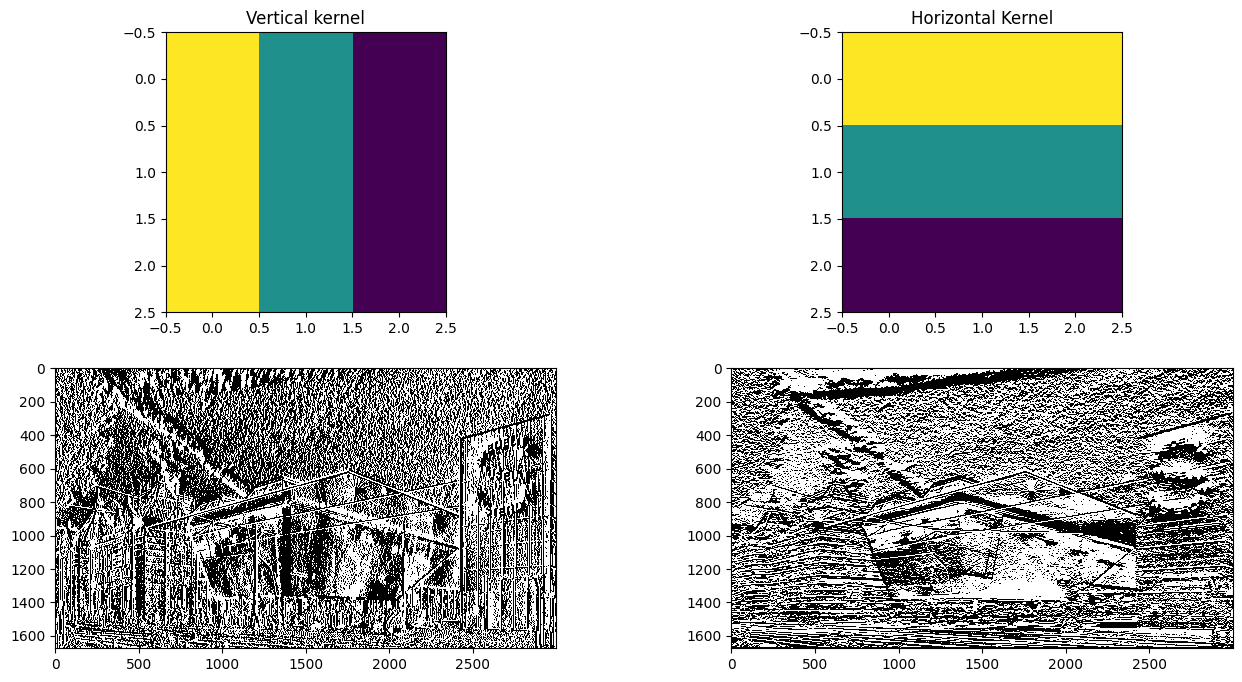

In [32]:
fig,ax= plt.subplots(2,2,figsize=(16,8))

ax[0,0].imshow(VK)
ax[0,0].set_title('Vertical kernel')


ax[0,1].imshow(HK)
ax[0,1].set_title('Horizontal Kernel')

convres = convolve2d(bathtub,VK,mode='same')
ax[1,0].imshow(convres,cmap='gray',vmin=0,vmax=.01)

convres =convolve2d(bathtub,HK,mode='same')
ax[1,1].imshow(convres,cmap='gray',vmin=0,vmax=.01)
plt.show()



In [34]:

import torch
import torch.nn.functional as F 

VK_t = torch.tensor(VK).view(1,1,3,3).double()
HK_t = torch.tensor(HK).view(1,1,3,3).double()

bathtub_t = torch.tensor(bathtub).view(1,1,bathtub.shape[0],bathtub.shape[1])

VK_t.shape
bathtub_t.shape


torch.Size([1, 1, 1675, 3000])

In [35]:
C = F.conv2d(bathtub_t,VK_t)
C.shape

torch.Size([1, 1, 1673, 2998])

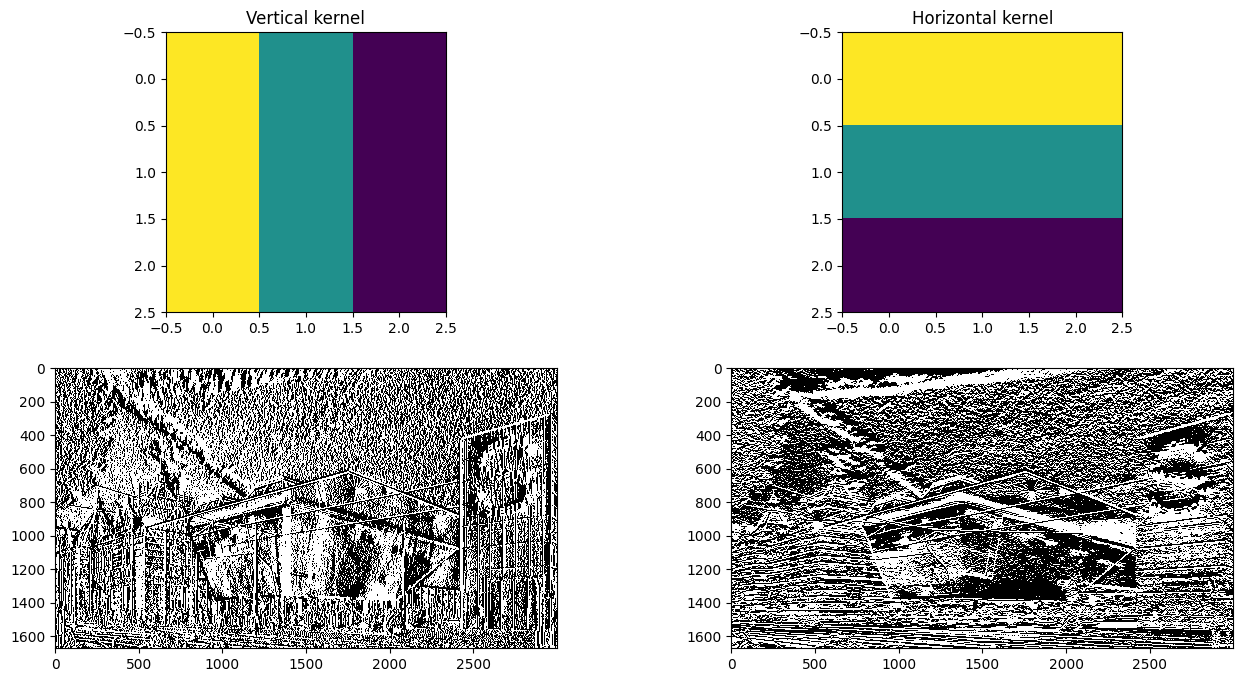

In [37]:
fig,ax = plt.subplots(2,2,figsize=(16,8))

ax[0,0].imshow(VK)
ax[0,0].set_title('Vertical kernel')

ax[0,1].imshow(HK)
ax[0,1].set_title('Horizontal kernel')


convres =F.conv2d(bathtub_t,VK_t)
img = torch.squeeze(convres.detach())

ax[1,0].imshow(img,cmap='gray',vmin=0,vmax=.01)

convres =F.conv2d(bathtub_t,HK_t)
img = torch.squeeze(convres.detach())

ax[1,1].imshow(img,cmap='gray',vmin=0,vmax=.01)

plt.show()

